<a href="https://colab.research.google.com/github/wontaaail/S.T.Geometry/blob/master/2019/11/07.%EC%97%AC%EA%B8%B0%20%EC%A3%BC%EC%84%9D%EC%B6%94%EA%B0%80%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


데이터를 새로 받아온다.

이미 데이터를 가지고 있는 경우에도 문제는 없지만 이 경우가 훨씬 편하다.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


데이터를 잘 받았으니 한번 이미지를 확인해볼까?

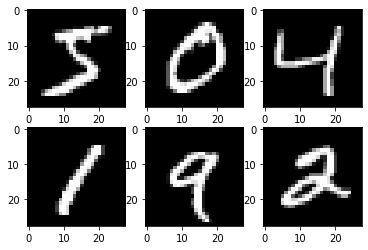

In [18]:
plt.subplot(231)
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' ))
plt.subplot(232)
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' ))
plt.subplot(233)
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' ))
plt.subplot(234)
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' ))
plt.subplot(235)
plt.imshow(X_train[4], cmap=plt.get_cmap( 'gray' ))
plt.subplot(236)
plt.imshow(X_train[5], cmap=plt.get_cmap( 'gray' ))

plt.subplot(abc) := a번째행, b번째열에서 c번째에 위치시킨다

그림이 잘 나오는 것을 확인할 수 있다.

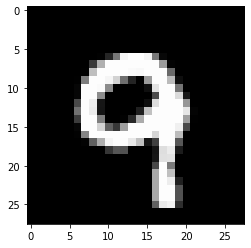

In [19]:
plt.subplot(111)
plt.imshow(X_test[99], cmap=plt.get_cmap( 'gray' ))

지금까지 해 온것처럼 베이스 작업을 한다.

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [0]:
seed = 6
numpy.random.seed(seed)

MNIST를 하기 전에 이미지에 대한 분석을 한다.

이 이미지는 총 60000개 혹은 10000개 (train, test)에 분배 되어있으며
28x28 의 해상도를 가진다.

아래의 X_train.shape 명령어를 사용해서 직접적인 수치를 확인해보자.

In [8]:
print(X_train.shape[1])
print(X_train.shape[2])

28
28


In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]

In [0]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype( 'float64' )
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype( 'float64' )

float := Mathematica 에서의 Flatten 명령어와 같다(평면화). 

차수를 1차원 내린다라고 생각하면 쉽게 이해가 될 것이다.

In [0]:
X_train = X_train / 255
X_test = X_test / 255

255라는 숫자는 명암도를 0부터 255로 표현할때 검정(0),하양(255)로 표현할 때

0, 255를 0, 1로 바꿔주는 것이다.

정말 그렇게 되는지 확인해본다.

In [25]:
print(X_train[23])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

원핫인코딩 (one-hot encoding) 처리

내용이 길기 때문에 스스로 읽어본다.

In [0]:
num_classes = y_test.shape[1]

In [30]:
print(num_classes)
print(num_pixels)

10
784


BostonHousing 처럼 모델을 새로 정의하여 여러바퀴를 돌린다(return)

In [0]:
def baseline_model():
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, init= 'normal' , activation= 'relu' ))
  model.add(Dense(num_classes, init= 'normal' , activation= 'softmax' ))
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model

In [31]:
model = baseline_model()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  after removing the cwd from sys.path.


In [32]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=7, batch_size=200,
verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  





Train on 60000 samples, validate on 10000 samples
Epoch 1/7





 - 7s - loss: 0.2818 - acc: 0.9199 - val_loss: 0.1320 - val_acc: 0.9622
Epoch 2/7
 - 6s - loss: 0.1095 - acc: 0.9688 - val_loss: 0.0956 - val_acc: 0.9703
Epoch 3/7
 - 6s - loss: 0.0703 - acc: 0.9796 - val_loss: 0.0822 - val_acc: 0.9751
Epoch 4/7
 - 6s - loss: 0.0502 - acc: 0.9853 - val_loss: 0.0729 - val_acc: 0.9760
Epoch 5/7
 - 6s - loss: 0.0356 - acc: 0.9900 - val_loss: 0.0625 - val_acc: 0.9796
Epoch 6/7
 - 6s - loss: 0.0265 - acc: 0.9927 - val_loss: 0.0588 - val_acc: 0.9813
Epoch 7/7
 - 6s - loss: 0.0198 - acc: 0.9951 - val_loss: 0.0591 - val_acc: 0.9806


In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [34]:
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.94%


아직 이 코드로는 에러값 및 정확도만을 구할 수 있다.

우리가 (으음 11월 7일에는 아직 필자만 보았기 때문에 필자는) 
6만개의 그림을 보여주고 그 숫자가 무엇인지 정확하게 (오차는 저 위의 수치만) 알게하는 코드를 할것이다. 이 부분에 대해서는 다음주에 시행

Note : 저 에러값을 더 줄일 수 있을까?